In [58]:
import pandas as pd # type: ignore
df=pd.read_csv('nafld1.csv')
df

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...,...,...
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1


In [59]:
df.shape

(17549, 10)

In [60]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [61]:
df.dtypes

Unnamed: 0      int64
id              int64
age             int64
male            int64
weight        float64
height        float64
bmi           float64
case.id       float64
futime          int64
status          int64
dtype: object

In [62]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)
df

,age,male,weight,height,bmi,case.id,futime,status
0,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,67,0,70.4,168.0,24.884028,14817.0,624,0
2,53,1,105.8,186.0,30.453537,3.0,1783,0
3,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,68,1,NaN,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...
17544,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,61,0,NaN,NaN,NaN,17276.0,3627,1


In [63]:
df.isna().sum()

age           0
male          0
weight     4786
height     3168
bmi        4961
case.id      31
futime        0
status        0
dtype: int64

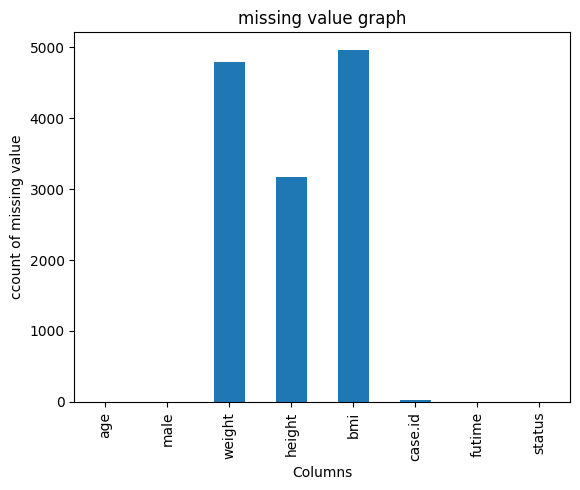

In [64]:
from matplotlib import pyplot as plt # type: ignore
df.isna().sum().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('ccount of missing value')
plt.title('missing value graph')
plt.show()

In [65]:
dup=df['case.id'].value_counts()
dup
# plt.xlabel('Columns')
# plt.ylabel('ccount of missing value')
# plt.title('missing value graph')
# plt.hist(dup)


case.id
15201.0    5
10630.0    5
14210.0    5
15255.0    5
15578.0    5
          ..
3047.0     3
2571.0     3
16112.0    3
4676.0     3
12212.0    2
Name: count, Length: 3853, dtype: int64

In [66]:
df.drop_duplicates(subset=['case.id'],inplace=True)

In [67]:
df['case.id'].value_counts()

case.id
16230.0    1
10630.0    1
14817.0    1
3.0        1
6628.0     1
          ..
12926.0    1
6286.0     1
16.0       1
15.0       1
12390.0    1
Name: count, Length: 3853, dtype: int64

In [68]:
df['weight']=df['weight'].fillna(df['weight'].mean())
df['height']=df['height'].fillna(df['height'].mean())
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df

,age,male,weight,height,bmi,case.id,futime,status
0,57,0,60.000000,163.000000,22.690939,10630.0,6261,0
1,67,0,70.400000,168.000000,24.884028,14817.0,624,0
2,53,1,105.800000,186.000000,30.453537,3.0,1783,0
3,56,1,109.300000,170.000000,37.830100,6628.0,3143,0
4,68,1,86.624399,169.612512,30.087467,1871.0,1836,1
...,...,...,...,...,...,...,...,...
14786,32,1,90.500000,185.000000,26.443376,14802.0,5979,0
14828,56,0,103.600000,168.000000,36.848303,15201.0,1628,0
14903,36,0,86.624399,169.612512,30.087467,15612.0,2501,0
14943,41,0,86.624399,169.612512,30.087467,15832.0,366,0


In [69]:
df.isna().sum()

age        0
male       0
weight     0
height     0
bmi        0
case.id    1
futime     0
status     0
dtype: int64

In [70]:
df.dropna(subset=["case.id"], inplace=True)

In [71]:
df.isna().sum()

age        0
male       0
weight     0
height     0
bmi        0
case.id    0
futime     0
status     0
dtype: int64

In [72]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [73]:
from sklearn.model_selection import train_test_split # type: ignore
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [74]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [75]:
from sklearn.naive_bayes import GaussianNB # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import confusion_matrix,classification_report # type: ignore
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
lst=[gnb,knn,sv]

In [76]:
for i in lst:
    print("***model name is",i,'***')
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("***confusion metrics***")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("***classification report***")
    cr=classification_report(y_test,y_pred)
    print(cr)
    print('*************************************************************************')

***model name is GaussianNB() ***
***confusion metrics***
[[1067    5]
 [  74   10]]
***classification report***
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      1072
           1       0.67      0.12      0.20        84

    accuracy                           0.93      1156
   macro avg       0.80      0.56      0.58      1156
weighted avg       0.92      0.93      0.91      1156

*************************************************************************
***model name is KNeighborsClassifier(n_neighbors=7) ***
***confusion metrics***
[[1070    2]
 [  77    7]]
***classification report***
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1072
           1       0.78      0.08      0.15        84

    accuracy                           0.93      1156
   macro avg       0.86      0.54      0.56      1156
weighted avg       0.92      0.93      0.91      1156

***********************

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif